<img src="images/bannerugentdwengo.png" alt="Dwengo" width="600"/>

<div>
    <font color=#690027 markdown="1">
        <h1>DIGITALE BEELDEN: VAN DRIE MATRICES NAAR EEN TENSOR</h1> 
    </font>
</div>

<div class="alert alert-block alert-success">
Foto's worden aan een computer gegeven in de vorm van een raster van getallen of een 'stapel' van rasters. In de wiskunde spreekt men respectievelijk van een <em>matrix</em> of een <em>tensor</em>.<br>
    Deze notebook toont hoe je de kleuren in een afbeeldingen vertaalt naar RGB-code en hoe je een kleurenafbeelding bekomt met een tensor.<br>
</div>

### Importeren van de nodige modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.ndimage

<div>
    <font color=#690027 markdown="1">
        <h2>1. Matrix</h2> 
    </font>
</div>

Hieronder volgt een tekening van een *geabstraheerde* boom waarin je slechts twee kleuren onderscheidt: wit en zwart. Heel wat details van een 'echte' boom zijn hier weggelaten. <br>De computer zal in de overeenkomstige matrixrepresentatie twee waarden onderscheiden: 0 voor zwart en 255 voor wit.<br><br>
Voer de volgende twee code-cellen uit om dit na te gaan.

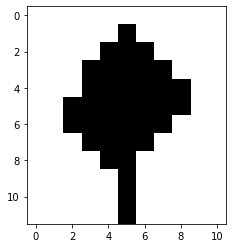

In [2]:
boom =  np.load("images/boom.npy")
plt.imshow(boom, cmap="gray")                 # cmap staat voor colormap

<div class="alert alert-block alert-info">
<b>Abstraheren</b> is bepaalde details van een probleem negeren zodat het gemakkelijker wordt om erover te redeneren.<br> <b>Abstractie</b> is een van de vier basisconcepten van computationeel denken.
</div>

In [3]:
print(boom)

[[255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255   0   0   0 255 255 255 255]
 [255 255 255   0   0   0   0   0 255 255 255]
 [255 255 255   0   0   0   0   0   0 255 255]
 [255 255   0   0   0   0   0   0   0 255 255]
 [255 255   0   0   0   0   0   0 255 255 255]
 [255 255 255   0   0   0   0 255 255 255 255]
 [255 255 255 255   0   0 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]]


<div class="alert alert-block alert-info">
    Het object waarnaar de variabele boom verwijst is een <b>matrix</b>, een raster van getallen (hier natuurlijke getallen). <br> Merk op dat de waarde 255 overeenkomt met wit en de waarde 0 met zwart. <br>
    Elke rij in de matrix komt overeen met een rij pixels.
</div>

Je kan de wiskundige dimensie van de matrix opvragen, maar ook het aantal elementen en welk type ze hebben.

In [4]:
print(boom.shape)                     # wiskundige dimensie van matrix 

(12, 11)


In [5]:
print(boom.size)                      # aantal elementen

132


In [6]:
print(boom.dtype)                     # type elementen

uint8


#### Opdracht 1.1
Hoeveel pixels bevat de figuur? 

Antwoord:

Antwoord: De figuur heeft evenveel pixels als er elementen in de afbeelding zijn, dus 132.

<div class="alert alert-block alert-warning">
    Je leert meer hierover in de notebook over grijswaardenafbeeldingen in het leerpad 'Digitale beelden'.
</div>

#### Opdracht 1.2
Geef gepaste instructies om de stam, de kruin en de achtergrond van de boom in de vorige afbeelding apart in te laden, en van elk de overeenkomstige afbeeldingen te laten zien.<br>
Deze bestanden vind je onder de namen `stam.npy`, `kruin.npy` en `achtergrond.npy` in de map `images`. 

In [7]:
# voorbeeldscript
stam =  np.load("images/stam.npy")
kruin =  np.load("images/kruin.npy")
achtergrond =  np.load("images/achtergrond.npy")

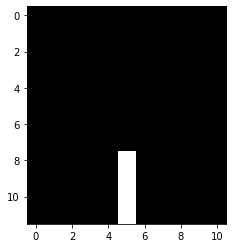

In [8]:
# voorbeeldscript
plt.imshow(stam, cmap="gray")     

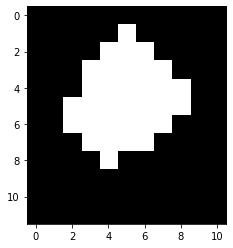

In [9]:
# voorbeeldscript
plt.imshow(kruin, cmap="gray")    

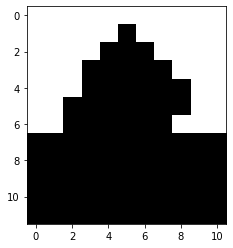

In [10]:
# voorbeeldscript
plt.imshow(achtergrond, cmap="gray")    

#### Opdracht 1.3
Vraag ook de drie overeenkomstige matrices op, en vergelijk de kleur van de pixels en hun waarde.  

In [11]:
# voorbeeldscript
print(stam)

[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255   0   0   0   0   0]
 [  0   0   0   0   0 255   0   0   0   0   0]
 [  0   0   0   0   0 255   0   0   0   0   0]
 [  0   0   0   0   0 255   0   0   0   0   0]]


In [12]:
# voorbeeldscript
print(kruin)

[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255   0   0   0   0   0]
 [  0   0   0   0 255 255 255   0   0   0   0]
 [  0   0   0 255 255 255 255 255   0   0   0]
 [  0   0   0 255 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255 255   0   0   0]
 [  0   0   0 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]]


In [13]:
# voorbeeldscript
print(achtergrond)

[[255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255   0   0   0 255 255 255 255]
 [255 255 255   0   0   0   0   0 255 255 255]
 [255 255 255   0   0   0   0   0   0 255 255]
 [255 255   0   0   0   0   0   0   0 255 255]
 [255 255   0   0   0   0   0   0 255 255 255]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]]


Besluit:

Besluit: De drie matrices hebben dezelfde (wiskundige) dimensie. In de afzonderlijke afbeeldingen hebben de pixels van de stam, de kruin en de achtergrond de waarde 255. De onderste pixels hebben in elk van de afzonderlijke afbeeldingen de waarde 0.  

<div>
    <font color=#690027 markdown="1">
        <h2>2. Tensor</h2> 
    </font>
</div>

<div>
    <font color=#690027 markdown="1">
        <h3>2.1 Matrices samenstellen tot een tensor</h3> 
    </font>
</div>

Je kan nu deze matrices 'samenstellen' tot een **tensor** door ze naast elkaar plaatsen. Je doet dat met de functie `dstack()` van de module NumPy. Test het effect daarvan uit door de volgende code-cel uit te voeren.

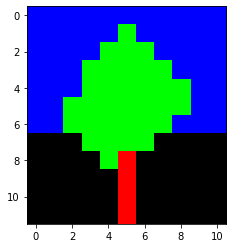

In [14]:
# matrices samenstellen tot tensor
boominkleur = np.dstack([stam, kruin, achtergrond])    # tensor

plt.imshow(boominkleur)

#### Opdracht 2.1.1
-  Welke wiskundige dimensie heeft de tensor waarnaar de variabele `boominkleur` verwijst?

Antwoord:

In [15]:
# voorbeeldscript
print(boominkleur.shape)

(12, 11, 3)


Antwoord: De wiskundige dimensie van deze tensor is 12 x 11 x 3.

<div class="alert alert-block alert-info">
    Je kan enkel matrices met <em>eenzelfde wiskundige dimensie</em> samenstellen tot een tensor. 
</div>

#### Opdracht 2.1.2
-  Laat het object zien waarnaar de variabele `boominkleur` verwijst.

In [16]:
print(boominkleur)

[[[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0 255   0]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]
  [  0 255   0

<div class="alert alert-block alert-info">
    Rij na rij pixels in de gekleurde afbeelding (met 11 pixels per rij) wordt ook in de tensor in die volgorde weergegeven. 
</div>

<div>
    <font color=#690027 markdown="1">
        <h3>2.2 RGB</h3> 
    </font>
</div>

In een kleurenafbeelding heeft elke pixel een kleur die weergegeven wordt in **RGB-code**: drie getallen die respectievelijk de intensiteit van rood, groen en blauw voorstellen.<br>
Als je nu deze drie matrices 'samenstelt'  door ze naast elkaar te plaatsen, dan bekom je een **tensor** die de boom in kleur weergeeft. De eerste matrix bepaalt de roodintensiteit van een kleur, de tweede matrix de groenintensiteit en de derde matrix de intensiteit van blauw.<br> Om de kleuren van een pixel te achterhalen, vorm je drietallen met de overeenkomstige elementen van de drie matrices.<br><br>
Bijvoorbeeld:
-  De pixels van de onderste rij hebben dan $RGB(0,0,0)$ en zijn dus zwart. 
-  De pixel rechtsboven heeft $RGB(0,0,255)$ en is dus blauw. 
-  De pixels van de kruin hebben $RGB(0,255,0)$ en zijn dus groen. 

#### Opdracht 2.2.1
-  Welke kleur zullen de pixels van de stam hebben?
-  Welke kleur zal de lucht hebben?

Antwoord:

Antwoord: De pixels van de stam hebben $RGB(255, 0, 0)$ en de pixels van de lucht hebben $RGB(0, 0, 255)$. De stam is dus rood en de lucht blauw.

#### Opdracht 2.2.2
-  Welke kleur zullen de pixels van de bodem hebben?

Antwoord:

Antwoord: De pixels van de bodem hebben $RGB(0, 0, 0)$ en zijn dus zwart.

<div class="alert alert-block alert-warning">
    Je leert meer over tensoren in de notebook over afbeeldingen in kleur in het leerpad 'Digitale beelden'.
</div>

<div>
    <font color=#690027 markdown="1">
        <h2>3. Weetje: colormaps</h2> 
    </font>
</div>

Hiervoor heb je steeds `gray` als *colormap* gebruikt. Je kan ook `Reds`, `Greens` en `Blues` gebruiken als colormap, om te benadrukken dat de eerste matrix de roodtinten, de tweede de groentinten en de derde de blauwtinten weergeeft.

#### Opdracht 3.1.1
Voer de volgende code uit om de afbeeldingen die overeenkomen met de drie matrices en de tensor naast elkaar te zetten. Wat valt je op?

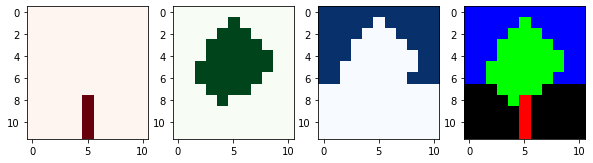

In [17]:
plt.figure(figsize=(10,15))
plt.subplot(1, 4, 1)
plt.imshow(stam, cmap="Reds")
plt.subplot(1, 4, 2)
plt.imshow(kruin, cmap="Greens")
plt.subplot(1, 4, 3)
plt.imshow(achtergrond, cmap="Blues")
plt.subplot(1, 4, 4)
plt.imshow(boominkleur)

Antwoord:

Antwoord: Waar de matrices afgebeeld zijn, is er een lichte kleur te zien waar je een donkere kleur verwacht.

<div class="alert alert-block alert-info">
    De colormaps geven <em>geïnverteerde kleuren</em>. D.w.z. dat de waarden van de pixels worden afgetrokken van 255, en het resultaat daarvan wordt getoond. Dat komt omdat de colormaps "Reds", "Greens" en "Blues" op die manier in Python zelf gemaakt zijn. <br> Je kan dit rechtzetten door eerst zelf de kleuren te inverteren.
</div>

In de volgende code-cel wordt de kleur geïnverteerd voor de eerste matrix.

In [18]:
stam_i = 255 - stam
print(stam_i)

[[255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]]


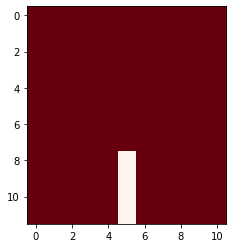

In [19]:
plt.imshow(stam_i, cmap="Reds")   

#### Opdracht 3.1.2
Inverteer nu ook de kleuren in de twee andere matrices. Controleer van beide het resultaat en bekijk de afbeeldingen. 

In [20]:
# voorbeeldscript
kruin_i = 255 - kruin
achtergrond_i = 255 -  achtergrond
print(kruin_i)
print(achtergrond_i)

[[255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255   0   0   0 255 255 255 255]
 [255 255 255   0   0   0   0   0 255 255 255]
 [255 255 255   0   0   0   0   0   0 255 255]
 [255 255   0   0   0   0   0   0   0 255 255]
 [255 255   0   0   0   0   0   0 255 255 255]
 [255 255 255   0   0   0   0 255 255 255 255]
 [255 255 255 255   0 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]]
[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255   0   0   0   0   0]
 [  0   0   0   0 255 255 255   0   0   0   0]
 [  0   0   0 255 255 255 255 255   0   0   0]
 [  0   0   0 255 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255 255   0   0   0]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]
 [255 255 25

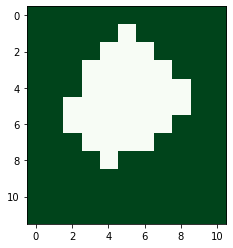

In [21]:
# voorbeeldscript
plt.imshow(kruin_i, cmap = "Greens")

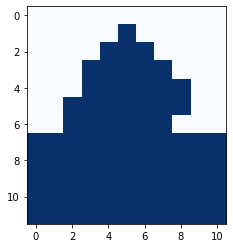

In [22]:
# voorbeeldscript
plt.imshow(achtergrond_i, cmap = "Blues")

#### Opdracht 3.1.3
Plaats opnieuw de afbeeldingen van de drie matrices en de tensor naast elkaar. 

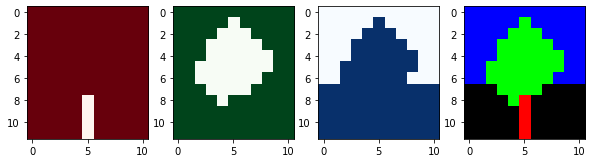

In [23]:
plt.figure(figsize=(10,15))
plt.subplot(1, 4, 1)
plt.imshow(stam_i, cmap="Reds")
plt.subplot(1, 4, 2)
plt.imshow(kruin_i, cmap="Greens")
plt.subplot(1, 4, 3)
plt.imshow(achtergrond_i, cmap="Blues")
plt.subplot(1, 4, 4)
plt.imshow(boominkleur)

#### Opdracht 3.2.1
Voer nu drie matrices in met dimensie 3 x 3. 
-  Stel ze samen tot een tensor en laat de overeenkomstige afbeelding zien. 

In [26]:
matrix_R = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])    # matrix voor roodtinten
matrix_G = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])    # matrix voor groentinten
matrix_B = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])    # matrix voor blauwtinten

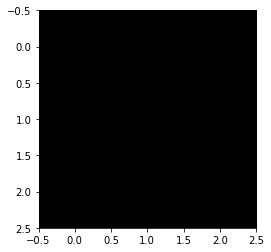

In [28]:
# voorbeeldscript
kleurenprent = np.dstack([matrix_R, matrix_G, matrix_B])    # tensor
plt.imshow(kleurenprent)

#### Opdracht 3.2.2
-  Probeer nu zelf kleuren te mengen, door de waarden in de rode, groene en blauwe matrix aan te passen. Je kan waarden van 0 t.e.m. 255 gebruiken voor de elementen van de matrices. 

In [29]:
# voorbeeldscript
matrix_R2 = np.array([[255, 255, 255], [100, 100, 100], [0, 0, 0]])    # matrix voor roodtinten
matrix_G2 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])    # matrix voor groentinten
matrix_B2 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])    # matrix voor blauwtinten

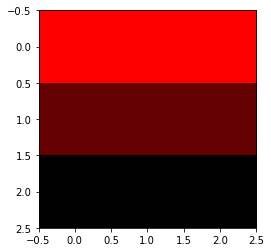

In [30]:
# voorbeeldscript
kleurenprent2 = np.dstack([matrix_R2, matrix_G2, matrix_B2])    # tensor
plt.imshow(kleurenprent)

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 